# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [8]:
df = pd.read_json('data/world_bank_projects.json')
df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


## Exercise 1
Find the 10 countries with most projects

In [9]:
# Compare length of country codes with length of country names
print(len(df['countrycode'].unique()))
df['countrycode'].unique()

118


array(['ET', 'TN', 'TV', 'RY', 'LS', 'KE', 'IN', 'CN', 'MA', 'SS', 'GH',
       'TP', 'JO', 'WS', 'MG', 'KH', 'KG', 'NP', 'TJ', 'AZ', '4E', 'LA',
       '4P', 'SB', 'MZ', 'AO', 'TZ', 'NG', 'SC', 'BD', 'SN', 'MM', 'GZ',
       'AR', 'GM', 'RU', 'CG', 'ST', '3A', 'UA', 'KM', 'CO', 'CI', 'SL',
       '1W', 'PE', 'EC', 'HN', 'AF', 'MR', 'LB', 'BF', 'MH', 'LR', 'ZW',
       'ML', 'ID', 'AM', 'GN', '8S', 'KZ', 'EG', 'HR', 'GE', 'TR', 'BR',
       'CV', 'BJ', 'TD', 'HT', 'PL', '5M', 'AL', 'VU', 'ZR', 'CM', 'CL',
       'BY', 'PK', 'AG', 'DJ', 'MN', 'TG', 'VN', 'NE', 'ZM', 'SD', 'MW',
       'UG', 'BT', 'MD', 'RW', 'XK', 'MK', 'BI', 'MV', 'YF', 'RO', 'UZ',
       'NI', 'PG', 'LK', 'MU', 'PA', 'PH', 'KI', 'TH', '7E', 'NA', 'CF',
       'MX', 'TO', 'UY', 'JM', 'BA', 'BO', 'CR', 'GT'], dtype=object)

In [10]:
# Compare length of country codes with length of country names
print(len(df['countryshortname'].unique()))
df['countryshortname'].unique()

118


array(['Ethiopia', 'Tunisia', 'Tuvalu', 'Yemen, Republic of', 'Lesotho',
       'Kenya', 'India', 'China', 'Morocco', 'South Sudan', 'Ghana',
       'Timor-Leste', 'Jordan', 'Samoa', 'Madagascar', 'Cambodia',
       'Kyrgyz Republic', 'Nepal', 'Tajikistan', 'Azerbaijan',
       'East Asia and Pacific', "Lao People's Democratic Republic",
       'Pacific Islands', 'Solomon Islands', 'Mozambique', 'Angola',
       'Tanzania', 'Nigeria', 'Seychelles', 'Bangladesh', 'Senegal',
       'Myanmar', 'West Bank and Gaza', 'Argentina', 'Gambia, The',
       'Russian Federation', 'Congo, Republic of',
       'Sao Tome and Principe', 'Africa', 'Ukraine', 'Comoros',
       'Colombia', "Cote d'Ivoire", 'Sierra Leone', 'World', 'Peru',
       'Ecuador', 'Honduras', 'Afghanistan', 'Mauritania', 'Lebanon',
       'Burkina Faso', 'Marshall Islands', 'Liberia', 'Zimbabwe', 'Mali',
       'Indonesia', 'Armenia', 'Guinea', 'South Asia', 'Kazakhstan',
       'Egypt, Arab Republic of', 'Croatia', 'Georgia', '

In [11]:
# Group by the country's short name and count by ID for count of total projects
top10_countries = (df.groupby(['countryshortname', 'countrycode'])['_id'].count()
                   # Convert back to DataFrame
                   .reset_index()
                   # Sort descending and show only top 10 countries
                   .sort_values(by='_id', ascending=False)[:10])
top10_countries.columns = ['country', 'countrycode', 'project_count']
top10_countries

,country,countrycode,project_count
23,China,CN,19
45,Indonesia,ID,19
112,Vietnam,VN,17
44,India,IN,16
115,"Yemen, Republic of",RY,13
73,Nepal,NP,12
8,Bangladesh,BD,12
69,Morocco,MA,12
70,Mozambique,MZ,11
1,Africa,3A,11


## Exercise 2
Find the top 10 major project themes

In [12]:
data = json.load((open('data/world_bank_projects.json')))
data[0]

{'sector': [{'Name': 'Primary education'},
  {'Name': 'Secondary education'},
  {'Name': 'Public administration- Other social services'},
  {'Name': 'Tertiary education'}],
 'supplementprojectflg': 'N',
 'projectfinancialtype': 'IDA',
 'prodline': 'PE',
 'mjtheme': ['Human development'],
 'idacommamt': 130000000,
 'impagency': 'MINISTRY OF EDUCATION',
 'project_name': 'Ethiopia General Education Quality Improvement Project II',
 'mjthemecode': '8,11',
 'closingdate': '2018-07-07T00:00:00Z',
 'totalcommamt': 130000000,
 'id': 'P129828',
 'mjsector_namecode': [{'code': 'EX', 'name': 'Education'},
  {'code': 'EX', 'name': 'Education'},
  {'code': 'BX', 'name': 'Public Administration, Law, and Justice'},
  {'code': 'EX', 'name': 'Education'}],
 'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
 'sector1': {'Percent': 46, 'Name': 'Primary education'},
 'lendinginstr': 'Investment Project Financing',
 'countrycode': 'ET',
 'sector2': {'Percent': 26

In [13]:
themes = json_normalize(data, 'mjtheme_namecode')
themes.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [14]:
themes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 2 columns):
code    1499 non-null object
name    1499 non-null object
dtypes: object(2)
memory usage: 23.5+ KB


In [15]:
themes['code'].unique()

array(['8', '11', '1', '6', '5', '2', '7', '4', '10', '9', '3'],
      dtype=object)

In [16]:
# Convert code to int since they're all unique values are ints
themes['code'] = themes['code'].astype(int)

In [17]:
# Count by code and sort descending
themes.groupby('code').count().sort_values(by='name', ascending=False)[:10]

,name
code,
11,250
10,216
8,210
2,199
6,168
4,146
7,130
5,77
9,50


## Exercise 3 
In Exercise 2, notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [18]:
# Look at count of empty names and other code names
themes.groupby('name').count()

,code
name,
,122
Economic management,33
Environment and natural resources management,223
Financial and private sector development,130
Human development,197
Public sector governance,184
Rule of law,12
Rural development,202
Social dev/gender/inclusion,119


In [19]:
# Dictionary with key: value pair being code: name
codes = {1: 'Economic management', 2: 'Public sector governance', 3: 'Rule of law', 
         4: 'Financial and private sector development', 5: 'Trade and integration', 
         6: 'Social protection and risk management', 7: 'Social dev/gender/inclusion', 8: 'Human development',
         9: 'Urban development', 10: 'Rural development', 11: 'Environmental and natural resources management'}

In [20]:
# Replace empty names with dictionary
themes['name'] = themes['code'].map(codes)

In [21]:
themes.head()

,code,name
0,8,Human development
1,11,Environmental and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [22]:
# Look at top 10 project themes again
top10_projects = themes.groupby('name').count().reset_index().sort_values(by='code', ascending=False)[:10]
top10_projects.columns = ['name', 'count']

# Merge with original themes DataFrame to add code column
top10_projects = pd.merge(top10_projects, themes, on='name').drop_duplicates().reset_index(drop=True)
top10_projects

,name,count,code
0,Environmental and natural resources management,250,11
1,Rural development,216,10
2,Human development,210,8
3,Public sector governance,199,2
4,Social protection and risk management,168,6
5,Financial and private sector development,146,4
6,Social dev/gender/inclusion,130,7
7,Trade and integration,77,5
8,Urban development,50,9
9,Economic management,38,1


In [23]:
top10_projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
name     10 non-null object
count    10 non-null int64
code     10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


## Visualize

In [24]:
import matplotlib.pyplot as plt

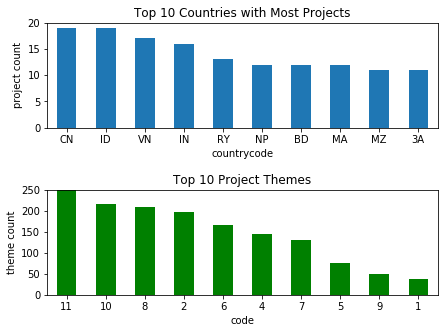

In [25]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5))
# Increase space between plots
fig.subplots_adjust(hspace=.6)

top10_countries.plot(x='countrycode', y='project_count', kind='bar', ax=ax1, rot=0, legend=False)
ax1.set_title("Top 10 Countries with Most Projects")
ax1.set_ylabel("project count")

top10_projects.plot(kind='bar', x='code', y='count', ax=ax2, rot=0, legend=False, color='green')
ax2.set_ylim((0, 250))
ax2.set_title("Top 10 Project Themes")
ax2.set_ylabel("theme count")

plt.show()